In [137]:
import cv2 as cv
from matplotlib import pyplot as plt


Load Image

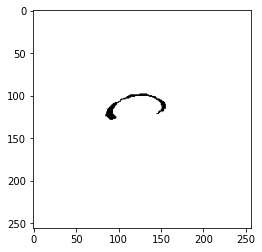

In [138]:
image_memory = cv.imread('images/oas1/OAS1_0001_MR1_69_ccseg.tif')
plt.imshow(image_memory)
plt.show()

inverting the color

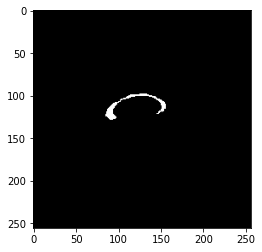

In [139]:
inverted_image = cv.bitwise_not(image_memory)
plt.imshow(inverted_image)
plt.show()

convert the image to grayscale format

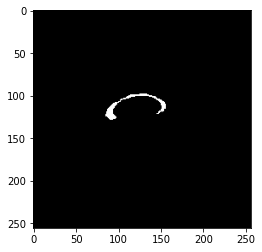

In [140]:
img_gray = cv.cvtColor(inverted_image, cv.COLOR_BGR2GRAY)
plt.imshow(inverted_image)
plt.show()

apply binary thresholding

In [141]:
ret, thresh = cv.threshold(img_gray, 150, 255, cv.THRESH_BINARY)

detect the contours on the binary image using cv2.CHAIN_APPROX_NONE

In [142]:
im2, contours, hierarchy = cv.findContours(image=thresh, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)

Check total contour

In [143]:
len(contours)

1

draw contours on the original image

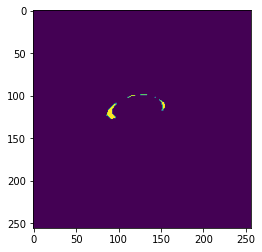

In [144]:
image_copy = img_gray.copy()
cv.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=1, lineType=cv.LINE_4)
plt.imshow(image_copy)
plt.show()

Print polylines from contour index 0 using matplotlib

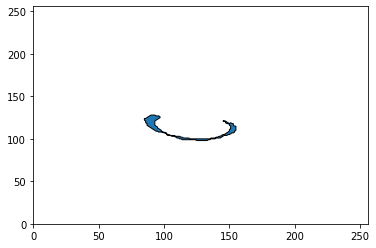

In [145]:
from matplotlib.path import Path
import matplotlib.patches as patches


contour = contours[0][:,0]
path = Path(contour, closed=True)
patch = patches.PathPatch(path, facecolor=None, lw=1, antialiased=True)

fig, ax = plt.subplots()
ax.add_patch(patch)
ax.set_xlim(0, 256)
ax.set_ylim(0, 256)
plt.show()

Display patch to shapely polygon

/Users/engineering/Documents/anaconda3/envs/shapely-pyvista/lib/python3.6/site-packages/descartes/patch.py:65: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  for t in polygon])


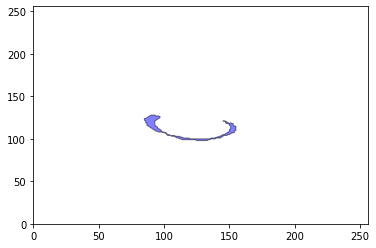

In [146]:
from shapely.geometry import Polygon, Point
import descartes

verts = patch.get_path().vertices
trans = patch.get_patch_transform()
points = trans.transform(verts)
poly = Polygon(points)

fig, ax = plt.subplots()
ax.add_patch(descartes.PolygonPatch(poly, fc='blue', alpha=0.5))
ax.set_xlim(0, 256)
ax.set_ylim(0, 256)
plt.show()